# Point operations


## Exercises

1. Show the histogram for the two modified images from the lab (`newim` and `newim2`).  Explain how the histogram shows visually how the colors have been transformed.  

*Note: put your text response in a text/Markdown cell, not in code comments.*

/tmp/ipykernel_8818/808709869.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('love_and_peace.jpg')


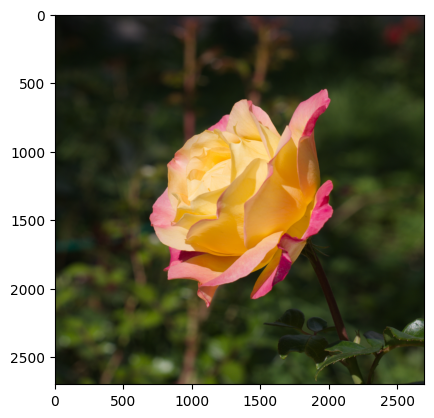

In [33]:
import imageio
import numpy as np
from matplotlib import pyplot as plt
import skimage

im = imageio.imread('love_and_peace.jpg')
plt.imshow(im)




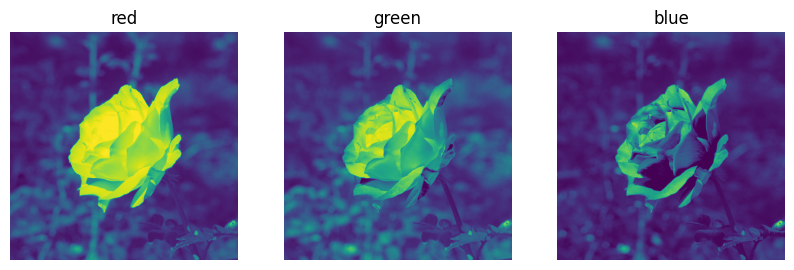

In [34]:


im = im.astype('float32')/255 #converting to floating point and mapping from 0-1

fig,axes = plt.subplots(1,3,figsize=(10,20)) #makes three figures, 1 row, 3 cols, then size

channels = ['red','green','blue'] # used for rgb and label of graphs
for i,(ax,channel) in enumerate(zip(axes,channels)): #pairs each channel with color channel name
    ax.imshow(im[...,i]) #show the image but only the i then color, ... means all elements of i color
    ax.axis('off')
    ax.set_title(channel)

 

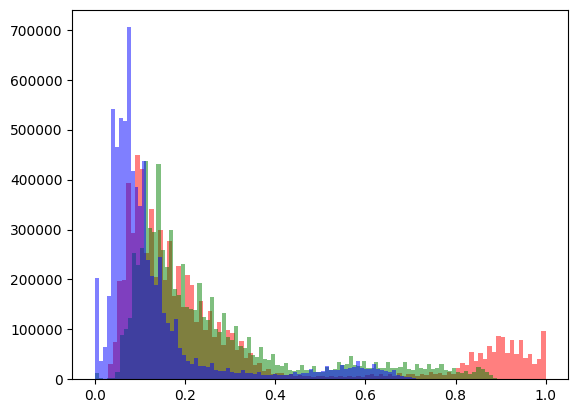

In [35]:
   
for i,channel in enumerate(channels): #interate through color channels
    plt.hist(im[...,i].flatten(),bins=100,color=channel,alpha=0.5) # change im[:,:,i]
    # need flattening here because histogram requires a 1D array, currently have 2D with rows and cols
    
plt.show()


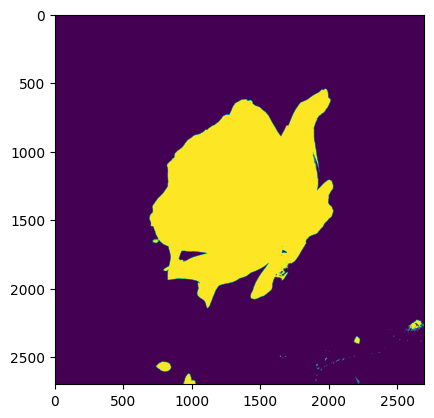

In [36]:
mask = im[...,0]>0.5
plt.imshow(mask)

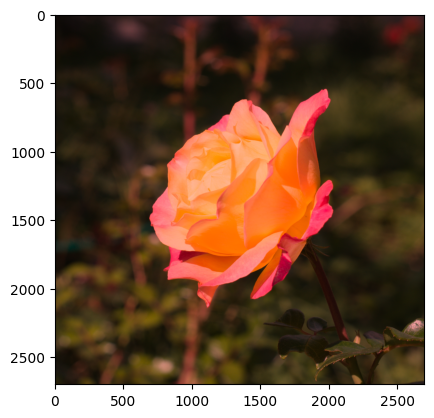

In [37]:
newim = im.copy() #values are already between 0-1

newim[...,0] *= 1.25 #converting red
newim[...,1] /= 1.25 #green
newim[...,2] /= 1.25 #blue
newim = np.clip(newim,0,1) #clip makes sure values of first input are between 2nd and third
plt.imshow(newim)

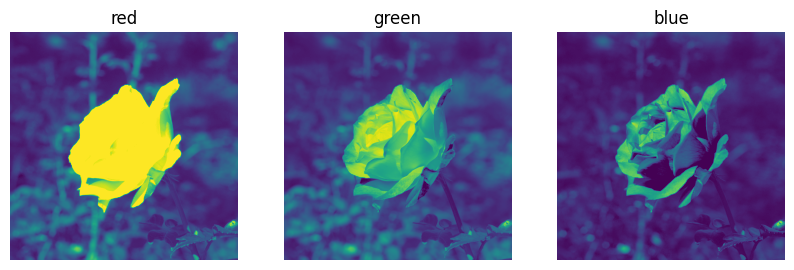

In [38]:
#Histogram for newim 



fig,axes = plt.subplots(1,3,figsize=(10,20)) #makes three figures, 1 row, 3 cols, then size

channels = ['red','green','blue'] # used for rgb and label of graphs
for i,(ax,channel) in enumerate(zip(axes,channels)): #pairs each channel with color channel name
    ax.imshow(newim[...,i]) #show the image but only the i then color, ... means all elements of i color
    ax.axis('off')
    ax.set_title(channel)

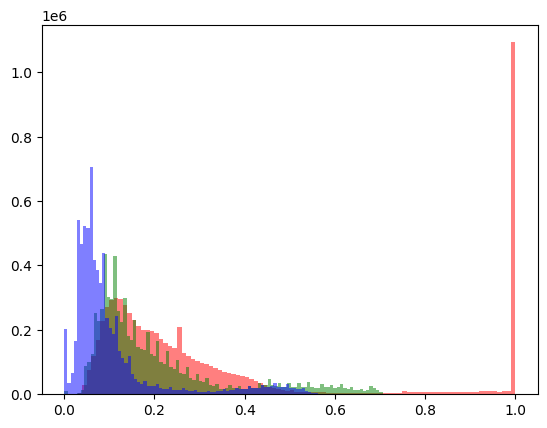

In [39]:
for i, channel in enumerate(channels):
    plt.hist(newim[...,i].flatten(), bins = 100, color = channel, alpha =.5)
plt.show()

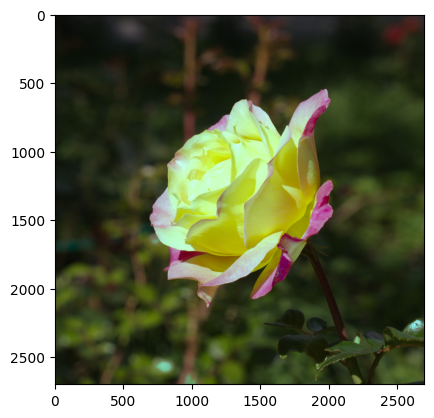

In [40]:
newim2 = im.copy()
newim2[mask,0] /= 1.25
newim2[mask,1] *= 1.25
newim2[mask,2] *= 1.25
newim2 = np.clip(newim2,0,1)
plt.imshow(newim2)

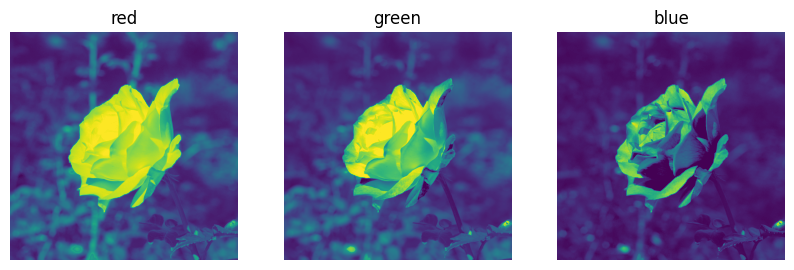

In [41]:

fig,axes = plt.subplots(1,3,figsize=(10,20)) #makes three figures, 1 row, 3 cols, then size

channels = ['red','green','blue'] # used for rgb and label of graphs
for i,(ax,channel) in enumerate(zip(axes,channels)): #pairs each channel with color channel name
    ax.imshow(newim2[...,i]) #show the image but only the i then color, ... means all elements of i color
    ax.axis('off')
    ax.set_title(channel)

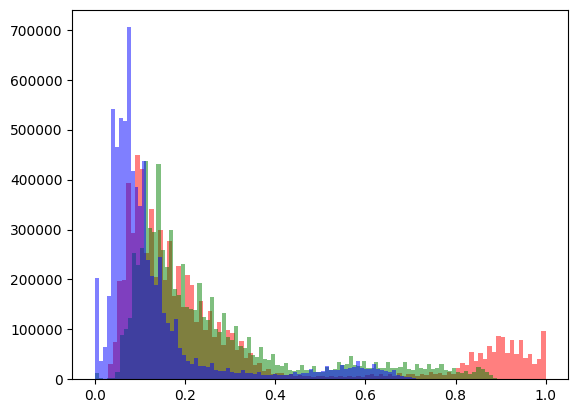

In [47]:
for i, channel in enumerate(channels):
    plt.hist(im[...,i].flatten(), bins = 100, color = channel, alpha =.5)
plt.show()

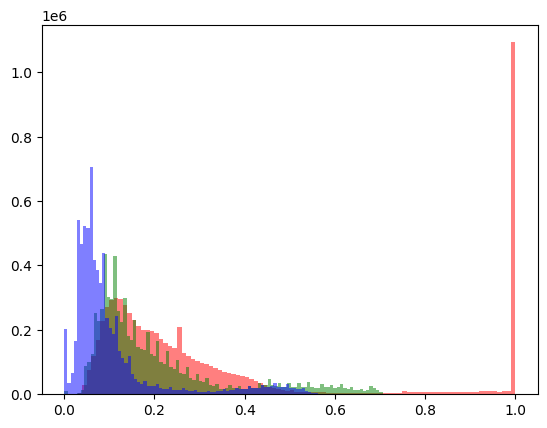

In [48]:
for i, channel in enumerate(channels):
    plt.hist(newim[...,i].flatten(), bins = 100, color = channel, alpha =.5)
plt.show()

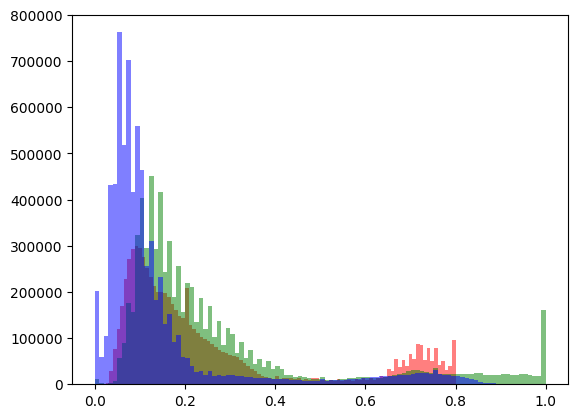

In [49]:
for i, channel in enumerate(channels):
    plt.hist(newim2[...,i].flatten(), bins = 100, color = channel, alpha =.5)
plt.show()

1. Show the histogram for the two modified images from the lab (`newim` and `newim2`).  Explain how the histogram shows visually how the colors have been transformed.  



2. Invert the image (compute one minus the image).  What does this do to the colors in the image?

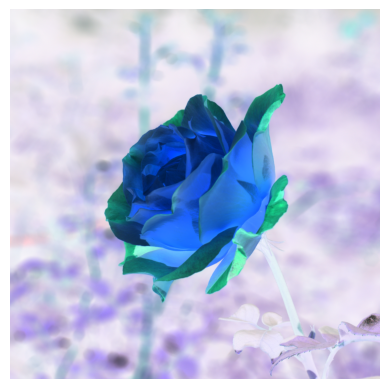

In [53]:
im.shape, im.dtype # already 0-1 so I use 1

invert = 1 - im

plt.imshow(invert)

plt.axis('off')
plt.show()

The colors have changed a lot visually. The inversion turns the orginal phots to their complimentary colors. The flower was yellow, now it is blue. 

3. Load the "hand" image (`hand.jpg`) and show it.  Show the three color channels separately.  Would it be easy to separate this image into foreground and background based on the red, green, or blue color channels alone?

/tmp/ipykernel_8818/58208471.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  hand = imageio.imread('hand.jpg')


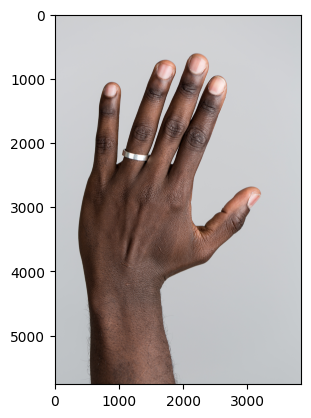

In [55]:
hand = imageio.imread('hand.jpg')
plt.imshow(hand)

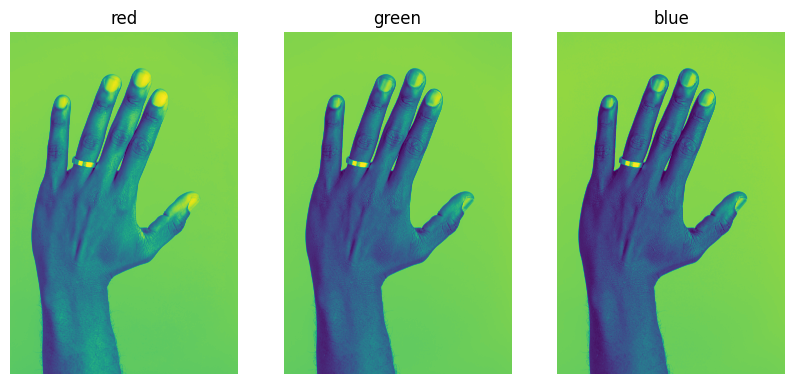

In [56]:
hand = hand.astype('float32')/255 


fig,axes = plt.subplots(1,3,figsize=(10,20)) #makes three figures, 1 row, 3 cols, then size

channels = ['red','green','blue'] # used for rgb and label of graphs
for i,(ax,channel) in enumerate(zip(axes,channels)): #pairs each channel with color channel name
    ax.imshow(hand[...,i]) #show the image but only the i then color, ... means all elements of i color
    ax.axis('off')
    ax.set_title(channel)


4. Now convert the image to the [Hue Saturation Value](https://en.wikipedia.org/wiki/HSL_and_HSV) colorspace (see [`skimage.color.rgb2hsv`](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html)).    Show each channel of the HSV image.  



5. Use a histogram to identify a good channel and threshold value for separating the image into foreground and background.  Apply the threshold and show the Boolean mask to evaluate the results.